In [ ]:
'''
1. データの読み込みと前処理(One-Hotのみ)を行う関数
'''
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

def prepare_data():
    '''データを用意する
    
    Returns:
      x_train(ndarray): 訓練データ(50000,32,32,3)
      x_test(ndarray) : テストデータ(10000,32,32,3)
      y_train(ndarray): 訓練データのOne-Hot化した正解ラベル(50000,)
      y_test(ndarray) : テストデータのOne-Hot化した正解ラベル(10000,)
    '''
    # CFAR-10の読み込み
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train.astype('float32'), x_test.astype('float32')

    # 訓練データとテストデータの正解ラベルを10クラスのOne-Hot表現に変換
    y_train, y_test = to_categorical(y_train), to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

In [ ]:
'''
2. モデルを生成するクラスの定義
'''
# tensorflowのインポート
import tensorflow as tf

class CNN(tf.keras.Model):
    '''畳み込みニューラルネットワーク

    '''
    def __init__(self):
        '''モデルを初期化する

        '''
        super().__init__()
        
        # 正則化の係数
        weight_decay = 1e-4

        # 正規化レイヤー
        self.std1 = tf.keras.layers.BatchNormalization()
        self.std2 = tf.keras.layers.BatchNormalization()
        self.std3 = tf.keras.layers.BatchNormalization()
        self.std4 = tf.keras.layers.BatchNormalization()
        self.std5 = tf.keras.layers.BatchNormalization()
        self.std6 = tf.keras.layers.BatchNormalization()

        # 第1層: 畳み込み層1 正則化を行う
        # (バッチサイズ,32,3,3) -> (バッチサイズ,32,32,32)
        self.conv2D_1 = tf.keras.layers.Conv2D(
            filters=32,                   # フィルター数32
            kernel_size=(3, 3),           # 3×3のフィルター
            padding='same',               # ゼロパディング
            input_shape=x_train.shape[1:], # 入力データの形状
            kernel_regularizer=tf.keras.regularizers.l2(
                weight_decay), # 正則化
            activation='relu'             # 活性化関数はReLU
            )

        # 第2層: 畳み込み層2: 正則化を行う
        # (バッチサイズ,32,32,32) ->(バッチサイズ,32,32,32)
        self.conv2D_2 = tf.keras.layers.Conv2D(
            filters=32,                   # フィルター数32
            kernel_size=(3, 3),           # 3×3のフィルター
            padding='same',               # ゼロパディング
            input_shape=x_train[0].shape, # 入力データの形状
            kernel_regularizer=tf.keras.regularizers.l2(
                weight_decay), # 正則化
            activation='relu'             # 活性化関数はReLU
            )

        # 第3層: プーリング層1: ウィンドウサイズは2×2
        # (バッチサイズ,32,32,32) -> (バッチサイズ,16,16,32)
        self.pool1 = tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2))             # 縮小対象の領域は2×2
        # ドロップアウト1：ドロップアウトは20％
        self.dropput1 = tf.keras.layers.Dropout(0.2)

        # 第4層: 畳み込み層3　正則化を行う
        # (バッチサイズ,16,16,32) ->(バッチサイズ,16,16,64)
        self.conv2D_3 = tf.keras.layers.Conv2D(
            filters=64,                  # フィルターの数は64
            kernel_size=(3, 3),           # 3×3のフィルターを使用
            padding='same',               # ゼロパディングを行う
            kernel_regularizer=tf.keras.regularizers.l2(
                weight_decay),           # 正則化
            activation='relu'             # 活性化関数はReLU
            )
        
        # 第5層: 畳み込み層4: 正則化を行う
        # (バッチサイズ,64,16,16) ->(バッチサイズ,64,16,16)
        self.conv2D_4 = tf.keras.layers.Conv2D(
            filters=64,                  # フィルターの数は256
            kernel_size=(3, 3),           # 3×3のフィルターを使用
            padding='same',               # ゼロパディングを行う
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay), # 正則化
            activation='relu'             # 活性化関数はReLU
            )

        # 第6層: プーリング層2: ウィンドウサイズは2×2
        # (バッチサイズ,16,16,64) -> (バッチサイズ,8,8,64)
        self.pool2 = tf.keras.layers.MaxPooling2D(
            pool_size=(2, 2))             # 縮小対象の領域は2×2
        # ドロップアウト2：ドロップアウトは30％
        self.dropput2 = tf.keras.layers.Dropout(0.3)

        # 第7層: 畳み込み層5: 正則化を行う
        # (バッチサイズ,8,8,64) -> (バッチサイズ,8,8,128)
        self.conv2D_5 = tf.keras.layers.Conv2D(
            filters=128,                  # フィルターの数は64
            kernel_size=(3, 3),           # 3×3のフィルターを使用
            padding='same',               # ゼロパディングを行う
            kernel_regularizer=tf.keras.regularizers.l2(
                weight_decay),           # 正則化
            activation='relu'             # 活性化関数はReLU
            )
        
        # 第8層: 畳み込み層6: 正則化を行う
        # (バッチサイズ,8,8,128) -> (バッチサイズ,8,8,128)
        self.conv2D_6 = tf.keras.layers.Conv2D(
            filters=128,                  # フィルターの数は256
            kernel_size=(3, 3),           # 3×3のフィルターを使用
            padding='same',               # ゼロパディングを行う
            kernel_regularizer=tf.keras.regularizers.l2(weight_decay), # 正則化
            activation='relu'             # 活性化関数はReLU
            )

        # 第9層: プーリング層3: ウィンドウサイズは2×2
        # (バッチサイズ,8,8,128) -> (バッチサイズ,4,4,128)
        self.pool3 = tf.keras.layers.MaxPooling2D(
            pool_size=(2, 2))             # 縮小対象の領域は2×2
        # ドロップアウト3：ドロップアウトは40％
        self.dropput3 = tf.keras.layers.Dropout(0.4)

        # Flatten: 4階テンソルから2階テンソルに変換
        # (バッチサイズ,4,4,128) -> (バッチサイズ,2048)
        self.flatten = tf.keras.layers.Flatten()

        # 第10層: 全結合層
        # (バッチサイズ,2048) -> (バッチサイズ,128)
        self.fc1 =  tf.keras.layers.Dense(
            128,                          # ニューロン数は128
            activation='relu')            # 活性化関数はReLU
        # ドロップアウト4：ドロップアウトは40％
        self.dropput4 = tf.keras.layers.Dropout(0.4)

        # 第11層: 出力層
        # (バッチサイズ,128) -> (バッチサイズ,10)
        self.fc2 =  tf.keras.layers.Dense(
            10,                           # 出力層のニューロン数は10
            activation='softmax')         # 活性化関数はソフトマックス

    @tf.function
    def call(self, x, training=None):
        '''CNNのインスタンスからコールバックされる関数
        
        Parameters: x(ndarray(float32)):訓練データ、または検証データ
        Returns(float32): CNNの出力として要素数10の1階テンソル        
        '''
        x = self.std1(self.conv2D_1(x))  # 畳み込み層1
        x = self.pool1(
            self.std2(self.conv2D_2(x))) # 畳み込み層2 ->プーリング1
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput1(x)

        x = self.std3(self.conv2D_3(x))  # 畳み込み層3
        x = self.pool2(
            self.std4(self.conv2D_4(x))) # 畳み込み層4 -> プーリング2
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput2(x)

        x = self.std5(self.conv2D_5(x)) # 畳み込み層5
        x = self.pool3(self.std6(
            self.conv2D_6(x)))          # 畳み込み層6 -> プーリング3
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput3(x)

        x = self.flatten(x) # (8, 8, 64)の出力を(4096,)にフラット化
        x = self.fc1(x) # 全結合層1
        # 訓練時のみドロップアウトを適用
        if training:
            x = self.dropput4(x)

        x = self.fc2(x) # 全結合層2
        return x

In [ ]:
'''
3. 損失関数とオプティマイザーの生成
'''
import tensorflow as tf

# マルチクラス分類のクロスエントロピー誤差を求めるオブジェクト
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
'''
4. 勾配降下アルゴリズムによるパラメーターの更新処理
'''
# 損失を記録するオブジェクトを生成
train_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(x, t):
    '''学習を1回行う関数
    
    Parameters: x(ndarray(float32)):訓練データ
                t(ndarray(float32)):正解ラベル
                
    Returns:
      ステップごとのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        # 訓練モードをTrueにして順伝搬の出力値を取得
        outputs = model(x, training=True)
        # 出力値と正解ラベルの誤差
        tmp_loss = loss_fn(t, outputs)
        
    # tapeに記録された操作を使用して誤差の勾配を計算        
    grads = tape.gradient(
        tmp_loss,                  # 現在のステップの誤差
        model.trainable_variables) # バイアス、重みのリストを取得
    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(zip(grads,
                                  model.trainable_variables))
    
    # 損失をMeanオブジェクトに記録
    train_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    train_accuracy(t, outputs)

In [ ]:
'''
5. モデルの検証を行う関数
'''
# 損失を記録するオブジェクトを生成
val_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
val_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def valid_step(val_x, val_y):
    # 訓練モードをFalseに指定して順伝搬の出力値を取得
    pred = model(val_x, training = False)
    tmp_loss = loss_fn(val_y, pred) # 出力値と正解ラベルの誤差
    val_loss(tmp_loss)  # 損失をMeanオブジェクトに記録
    val_accuracy(val_y, pred) # 精度を記録

In [ ]:
%%time
'''
6. データを用意して学習を行う
'''
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = prepare_data()

# エポック数
epochs = 120
# ミニバッチのサイズ
batch_size = 64
# 訓練データのステップ数
train_steps = x_train.shape[0] // batch_size
# 検証データのステップ数
val_steps = x_test.shape[0] // batch_size

# モデルを生成
model = CNN()
# 損失と精度の履歴を保存するためのdictオブジェクト
history = {'loss':[],'accuracy':[], 'val_loss':[], 'val_accuracy':[]}

# データジェネレーターを生成
# 訓練データ
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,# データセット全体の平均値を取得
    featurewise_std_normalization=True, # データを標準化する
    width_shift_range=0.1,  # 横サイズの0.1の割合でランダムに水平移動
    height_shift_range=0.1, # 縦サイズの0.1の割合でランダムに垂直移動
    rotation_range=10,      # 10度の範囲でランダムに回転させる
    zoom_range=0.1,         # ランダムに拡大
    horizontal_flip=True)   # 左右反転
# テストデータ
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,# データセット全体の平均値を取得
    featurewise_std_normalization=True, # データを標準化する
)

# ジェネレーターで正規化を行う場合はfit()でデータに適合させる
# 訓練データ
train_datagen.fit(x_train)
# テストデータ
test_datagen.fit(x_test)

# ジェネレーターにミニバッチを適合させる
# 訓練データ
train_generator = train_datagen.flow(
    x_train, # 訓練データ
    y_train, # 正解ラベル
    batch_size=batch_size
    )
# 検証データ
validation_generator = test_datagen.flow(
    x_test, # テストデータ
    y_test, # 正解ラベル
    batch_size=batch_size
    )

# 学習を行う
for epoch in range(epochs):
    # 訓練時のステップカウンター  
    step_counter = 0  
    # 1ステップ毎にミニバッチで学習する
    for x_batch, t_batch in train_generator:
        # ミニバッチでバイアス、重みを更新
        train_step(x_batch, t_batch)
        step_counter += 1
        # すべてのステップが終了したらbreak
        if step_counter >= train_steps:
            break
    
    # 検証時のステップカウンター
    v_step_counter = 0
    # 検証データによるモデルの評価
    for x_val_batch, t_val_batch  in validation_generator:
        # 検証データのミニバッチで損失と精度を測定
        valid_step(x_val_batch, t_val_batch)
        v_step_counter += 1
        # すべてのステップが終了したらbreak
        if v_step_counter >= val_steps:
            break
   
    avg_train_loss = train_loss.result()    # 訓練時の平均損失値を取得
    avg_train_acc = train_accuracy.result() # 訓練時の平均正解率を取得
    avg_val_loss = val_loss.result()     # 検証時の平均損失値を取得
    avg_val_acc = val_accuracy.result()  # 検証時の平均正解率を取得

    # 損失の履歴を保存する
    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    # 精度の履歴を保存する
    history['accuracy'].append(avg_train_acc)
    history['val_accuracy'].append(avg_val_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc: {:.4} val_loss: {:.4} val_acc: {:.4}'.format(
                epoch+1,
                avg_train_loss, # 現在の損失を出力
                avg_train_acc,  # 現在の精度を出力
                avg_val_loss,   # 現在の損失を出力
                avg_val_acc     # 現在の精度を出力
    ))

# モデルの概要を出力
model.summary()

epoch(1) train_loss: 1.82 train_acc: 0.3362 val_loss: 1.498 val_acc: 0.4525
epoch(2) train_loss: 1.63 train_acc: 0.4079 val_loss: 1.346 val_acc: 0.5217
epoch(3) train_loss: 1.499 train_acc: 0.4596 val_loss: 1.226 val_acc: 0.5674
epoch(4) train_loss: 1.399 train_acc: 0.4993 val_loss: 1.133 val_acc: 0.6021
epoch(5) train_loss: 1.319 train_acc: 0.5305 val_loss: 1.086 val_acc: 0.6199
epoch(6) train_loss: 1.255 train_acc: 0.5551 val_loss: 1.049 val_acc: 0.6352
epoch(7) train_loss: 1.2 train_acc: 0.5762 val_loss: 0.999 val_acc: 0.6532
epoch(8) train_loss: 1.154 train_acc: 0.5943 val_loss: 0.9586 val_acc: 0.6676
epoch(9) train_loss: 1.115 train_acc: 0.6092 val_loss: 0.929 val_acc: 0.6793
epoch(10) train_loss: 1.08 train_acc: 0.6227 val_loss: 0.911 val_acc: 0.6866
epoch(11) train_loss: 1.048 train_acc: 0.6343 val_loss: 0.8891 val_acc: 0.6948
epoch(12) train_loss: 1.021 train_acc: 0.6445 val_loss: 0.8686 val_acc: 0.7022
epoch(13) train_loss: 0.9956 train_acc: 0.6541 val_loss: 0.8485 val_acc: 0.

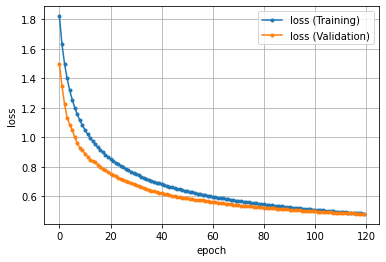

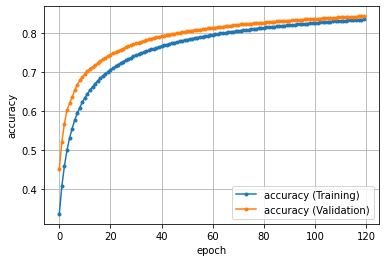

In [ ]:
'''
7. 損失と精度の推移をグラフにする
'''
import matplotlib.pyplot as plt
%matplotlib inline

# 学習結果（損失）のグラフを描画
plt.plot(history['loss'],
         marker='.',
         label='loss (Training)')
plt.plot(history['val_loss'],
         marker='.',
         label='loss (Validation)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 学習結果（精度）のグラフを描画
plt.plot(history['accuracy'],
         marker='.',
         label='accuracy (Training)')
plt.plot(history['val_accuracy'],
         marker='.',
         label='accuracy (Validation)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()